In [1]:
import os
import csv
import pandas as pd
import collections as ct
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
from scipy.stats import linregress



In [2]:
chum_path = 'C:/Users/bassa/projects/wildfire/resources/'
chum_csv_file = 'fire_clean.csv'
chum_csv_filepath = os.path.join(chum_path, chum_csv_file)
print(chum_csv_filepath)

C:/Users/bassa/projects/wildfire/resources/fire_clean.csv


In [3]:
dirty_fire = pd.read_csv(chum_csv_filepath)

In [4]:
clean_df = pd.read_csv(chum_csv_filepath, lineterminator='\n')

In [5]:
clean_df.head()

,FOD_ID,SOURCE_SYSTEM,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE
0,1,FS-FIRESTAT,Plumas National Forest,2005,Miscellaneous,0.10,A,40.036944,-121.005833,CA
1,2,FS-FIRESTAT,Eldorado National Forest,2004,Lightning,0.25,A,38.933056,-120.404444,CA
2,3,FS-FIRESTAT,Eldorado National Forest,2004,Debris Burning,0.10,A,38.984167,-120.735556,CA
3,4,FS-FIRESTAT,Eldorado National Forest,2004,Lightning,0.10,A,38.559167,-119.913333,CA
4,5,FS-FIRESTAT,Eldorado National Forest,2004,Lightning,0.10,A,38.559167,-119.933056,CA


In [6]:
states_number = clean_df['STATE'].nunique()

states_number 

52

In [7]:
lat_mode = clean_df["LATITUDE"].mode()

lat_mode 


0    47.8666
dtype: float64

In [8]:
long_mode = clean_df["LONGITUDE"].mode()

long_mode

0   -110.4518
dtype: float64

In [9]:
state_mode = clean_df["STATE"].mode()

state_mode

0    CA
dtype: object

In [10]:
source_mode = clean_df["SOURCE_REPORTING_UNIT_NAME"].mode()

source_mode

0    Georgia Forestry Commission
dtype: object

In [11]:
class_mode = clean_df["FIRE_SIZE_CLASS"].mode()

class_mode

0    B
dtype: object

In [12]:
class_max = clean_df["FIRE_SIZE"].max()

class_max

606945.0

In [13]:
locations = clean_df[["LATITUDE", "LONGITUDE"]]

locations

,LATITUDE,LONGITUDE
0,40.036944,-121.005833
1,38.933056,-120.404444
2,38.984167,-120.735556
3,38.559167,-119.913333
4,38.559167,-119.933056
...,...,...
1880460,40.481637,-122.389375
1880461,37.617619,-120.938570
1880462,37.617619,-120.938570
1880463,37.672235,-120.898356


In [14]:
clean_df["STATE"].mode()

0    CA
dtype: object

In [15]:
size_mean = clean_df["FIRE_SIZE"].mean

clean_df

,FOD_ID,SOURCE_SYSTEM,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE
0,1,FS-FIRESTAT,Plumas National Forest,2005,Miscellaneous,0.10,A,40.036944,-121.005833,CA
1,2,FS-FIRESTAT,Eldorado National Forest,2004,Lightning,0.25,A,38.933056,-120.404444,CA
2,3,FS-FIRESTAT,Eldorado National Forest,2004,Debris Burning,0.10,A,38.984167,-120.735556,CA
3,4,FS-FIRESTAT,Eldorado National Forest,2004,Lightning,0.10,A,38.559167,-119.913333,CA
4,5,FS-FIRESTAT,Eldorado National Forest,2004,Lightning,0.10,A,38.559167,-119.933056,CA
...,...,...,...,...,...,...,...,...,...,...
1880460,300348363,ST-CACDF,Shasta-Trinity Unit,2015,Missing/Undefined,0.01,A,40.481637,-122.389375,CA
1880461,300348373,ST-CACDF,Tuolumne-Calaveras Unit,2015,Miscellaneous,0.20,A,37.617619,-120.938570,CA
1880462,300348375,ST-CACDF,Tuolumne-Calaveras Unit,2015,Missing/Undefined,0.10,A,37.617619,-120.938570,CA
1880463,300348377,ST-CACDF,Tuolumne-Calaveras Unit,2015,Missing/Undefined,2.00,B,37.672235,-120.898356,CA


In [16]:
most_common_source = clean_df["STAT_CAUSE_DESCR"].mode()

most_common_source 

0    Debris Burning
dtype: object

In [17]:
cause_and_size = clean_df[["STATE","STAT_CAUSE_DESCR"]]

cause_and_size = cause_and_size.set_index("STATE")

cause_and_size.head()


,STAT_CAUSE_DESCR
STATE,
CA,Miscellaneous
CA,Lightning
CA,Debris Burning
CA,Lightning
CA,Lightning


In [18]:
causes = clean_df['STAT_CAUSE_DESCR']

In [19]:
x_axis = np.arange(len(clean_df))
tick_locations = [value+0.4 for value in x_axis]

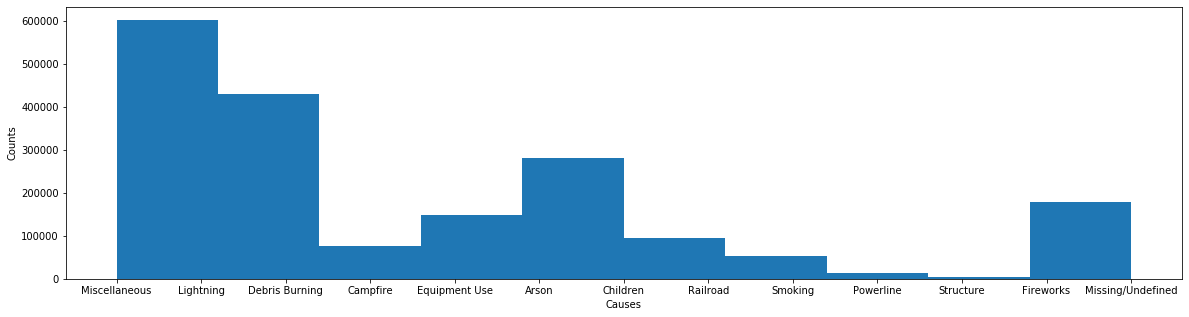

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [25]:



plt.figure(figsize=(20,5))
plt.hist(causes)
plt.xlabel('Causes')
plt.ylabel('Counts')
plt.show()

print(sts.normaltest(causes.sample(50)))



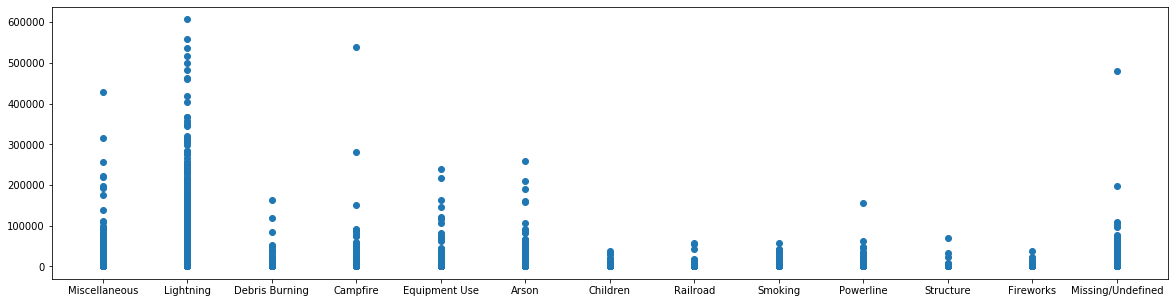

In [22]:
plt.figure(figsize=(20,5))

plt.scatter(clean_df.iloc[:,4], clean_df.iloc[:,5])



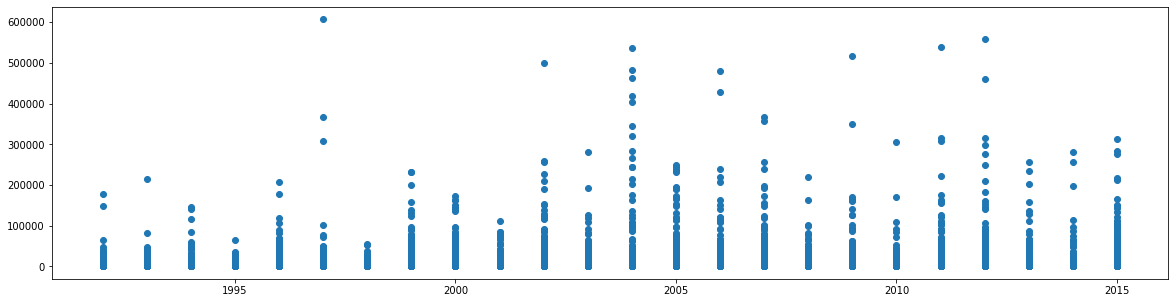

In [24]:
plt.figure(figsize=(20,5))

plt.scatter(clean_df.iloc[:,3], clean_df.iloc[:,5])



In [ ]:
x_axis = clean_df.iloc[:,9]
y_axis = clean_df.iloc[:,4]

In [ ]:
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")

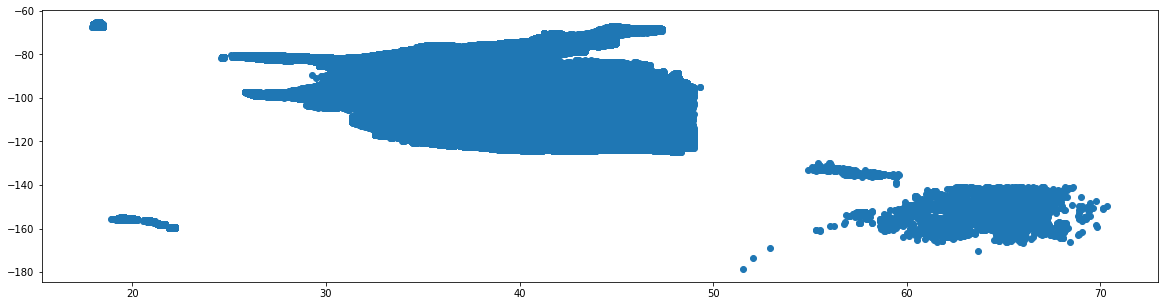

In [26]:
plt.figure(figsize=(20,5))

plt.scatter(clean_df.iloc[:,7], clean_df.iloc[:,8])


In [27]:
figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

NameError: name 'gmaps' is not defined